In [2]:
import pandas as pd
from readresults.readres_mvpa import merge_results, parse_roi_info, exclude_participants, fill_in_nvoxels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mne.stats import permutation_cluster_1samp_test
import pingouin as pg
from plotting.plot import plot_by_nvoxels, get_tfce_stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Info coupling spheres

In [3]:
res_list = ['../../../MVPA_results/results_infocouplspheres.csv',
            '../../../MVPA_results/results_infocouplspheres_moreradii.csv']
results = merge_results(res_list)

In [4]:
results = parse_roi_info(results)
results = exclude_participants(results)
#results = fill_in_nvoxels(results)

In [5]:
results.radius.unique()

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [6]:
meanres = results.groupby(['subject', 'radius']).mean().reset_index()

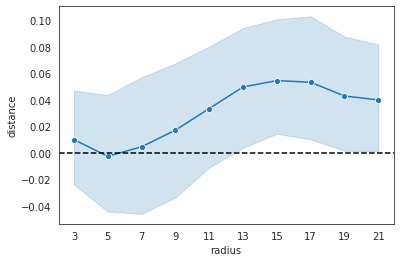

In [7]:
sns.set_style('white')
p = sns.lineplot(data=meanres, x='radius', y='distance', ci=95, marker='o')
p.set_xticks(meanres.radius.unique())
p.set_xticklabels(meanres.radius.unique())
plt.axhline(0.0, linestyle='--', color='k')
plt.savefig('results_plots/ba19sphere.pdf')

In [8]:
meanres = meanres.rename(columns={'radius': 'nvoxels'})

In [9]:
# _, _, tfce_pvals_spheres, _ = get_tfce_stats(meanres,
#                               measure='distance', n_perms=10000)

In [10]:
pg.ttest(meanres[meanres['nvoxels']==17].distance,
         0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.259624,29,two-sided,0.031532,"[0.01, 0.1]",0.412549,1.734,0.58881


## N. voxels on BA19/37

In [11]:
res_list = ['../../../MVPA_results/results_distfromboundcorrect.csv']
results = merge_results(res_list)
results = parse_roi_info(results)
#results = exclude_participants(results)
results = results.groupby(['subject', 'roi', 'hemi', 'nvoxels']).mean().reset_index()

In [12]:
results.subject.nunique()

34

In [13]:
bothrois_avg = results.groupby(['subject', 'roi']).mean().reset_index()

In [14]:
aov = pg.ttest(bothrois_avg[bothrois_avg['roi']=='ba-17-18'].distance,
               bothrois_avg[bothrois_avg['roi']=='ba-19-37'].distance,
               paired=True)
aov.round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.3941,33,two-sided,0.696,"[-0.05, 0.07]",0.0674,0.198,0.0668


In [15]:
pg.ttest(bothrois_avg.groupby(['subject']).mean().reset_index().distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.984209,33,two-sided,0.0556,"[-0.0, 0.1]",0.340289,1.048,0.486641


In [16]:
res_1718 = results[results['roi']=='ba-17-18']
res_1937 = results[results['roi']=='ba-19-37']

In [17]:
res_1718.distance.agg(['mean', 'sem'])

mean    0.057494
sem     0.004014
Name: distance, dtype: float64

In [18]:
meanres = res_1718.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.553794,33,two-sided,0.129773,"[-0.02, 0.13]",0.266474,0.546,0.326149


In [19]:
meanres = res_1718.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.correct, 0.5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.761236,33,two-sided,0.087463,"[0.5, 0.56]",0.302049,0.736,0.401422


In [20]:
res_1937.distance.agg(['mean', 'sem'])

mean    0.045709
sem     0.002453
Name: distance, dtype: float64

In [21]:
res_1718.correct.agg(['mean', 'sem'])

mean    0.528388
sem     0.001798
Name: correct, dtype: float64

In [22]:
meanres = res_1937.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.202794,33,two-sided,0.034702,"[0.0, 0.09]",0.377776,1.531,0.570839


In [23]:
meanres = res_1937.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.correct, 0.5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.132232,33,two-sided,0.04052,"[0.5, 0.54]",0.365675,1.35,0.543823


In [24]:
res_1937.subject.nunique()

34

In [25]:
_, _, tfce_pvals_1937, _ = get_tfce_stats(res_1937.groupby(['subject','nvoxels']).mean().reset_index(),
                                          measure='distance', n_perms=10000)
# tfce_pvals_1937 = [0.7694, 0.561 , 0.312 , 0.1888, 0.1308, 0.1215, 0.1264, 0.0932,
#        0.0761, 0.0542, 0.0932, 0.0813, 0.0916, 0.0795, 0.0714, 0.0992,
#        0.0795, 0.0795, 0.0684, 0.0714, 0.0883, 0.061 , 0.0494, 0.0494,
#        0.0533, 0.0486, 0.0407, 0.0438, 0.0399, 0.0368, 0.0331, 0.0277,
#        0.023 , 0.0218, 0.023 , 0.0207, 0.0231, 0.0218, 0.0207, 0.0204,
#        0.0164, 0.0181, 0.0154, 0.0144, 0.0146, 0.013 , 0.013 , 0.0118,
#        0.011 , 0.011 , 0.0108, 0.0112, 0.0107, 0.0118, 0.0127, 0.0122,
#        0.0113, 0.0113, 0.0127, 0.0137]

stat_fun(H1): min=0.300291 max=2.843473
Running initial clustering
Using 285 thresholds from 0.00 to 2.84 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [27]:
tfce_pvals_1937

array([0.9977, 0.9386, 0.726 , 0.555 , 0.4643, 0.4477, 0.4643, 0.3848,
       0.302 , 0.2559, 0.3401, 0.2931, 0.3289, 0.2806, 0.2636, 0.3065,
       0.2559, 0.2476, 0.2256, 0.2341, 0.2559, 0.1874, 0.1597, 0.1537,
       0.1729, 0.1597, 0.1423, 0.157 , 0.1423, 0.1356, 0.1256, 0.1145,
       0.0992, 0.0899, 0.0899, 0.0818, 0.0872, 0.0784, 0.0736, 0.0706,
       0.06  , 0.0605, 0.0547, 0.0517, 0.0517, 0.048 , 0.048 , 0.0436,
       0.0402, 0.0364, 0.0364, 0.0354, 0.0322, 0.0354, 0.0373, 0.0373,
       0.0364, 0.0354, 0.0379, 0.0402])

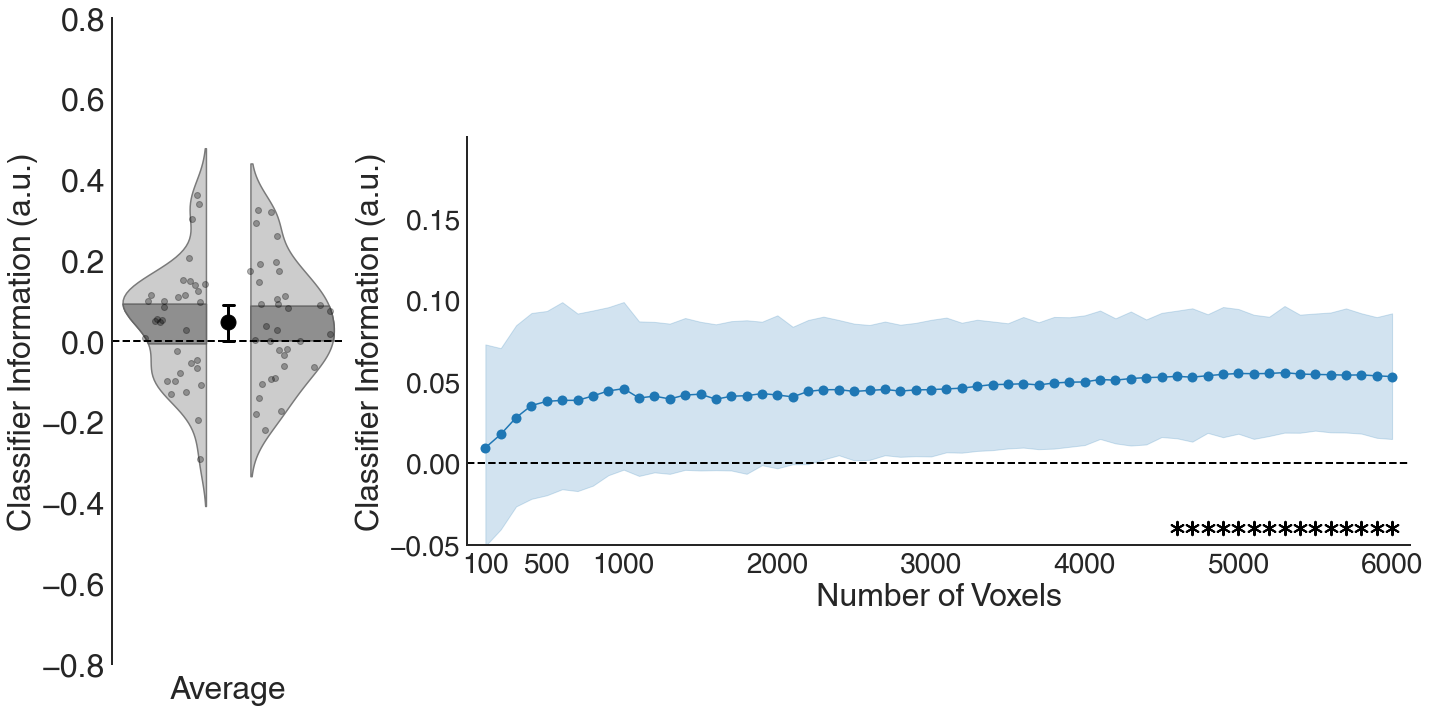

In [28]:
plot_by_nvoxels(res_1937, right_part=True, tfce_pvals=tfce_pvals_1937)
plt.savefig('results_plots/vistemp_1937_nvox_noexcl.svg')

In [29]:
_, _, tfce_pvals_1718, _ = get_tfce_stats(res_1718.groupby(['subject','nvoxels']).mean().reset_index(),
                                          measure='distance', n_perms=10000)
# tfce_pvals_1718 = [0.5935, 0.5152, 0.569 , 0.5555, 0.4316, 0.426 , 0.2916, 0.2832,
#        0.2916, 0.3109, 0.3061, 0.3013, 0.3541, 0.3868, 0.3408, 0.3013,
#        0.3177, 0.3177, 0.2962, 0.3061, 0.3061, 0.3227, 0.3177, 0.3013,
#        0.2785, 0.2583, 0.2328, 0.226 , 0.2365, 0.226 , 0.2224, 0.2153,
#        0.2082, 0.2082, 0.2132, 0.2153, 0.2114, 0.2046, 0.1977, 0.1883,
#        0.1801, 0.1801, 0.1801, 0.1801, 0.1762, 0.1762, 0.1739, 0.1739,
#        0.1712, 0.1712, 0.1712, 0.1712, 0.1712, 0.1687, 0.1687, 0.1687,
#        0.1687, 0.1687, 0.1687, 0.1687]

stat_fun(H1): min=0.595763 max=1.914409
Running initial clustering
Using 192 thresholds from 0.00 to 1.91 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


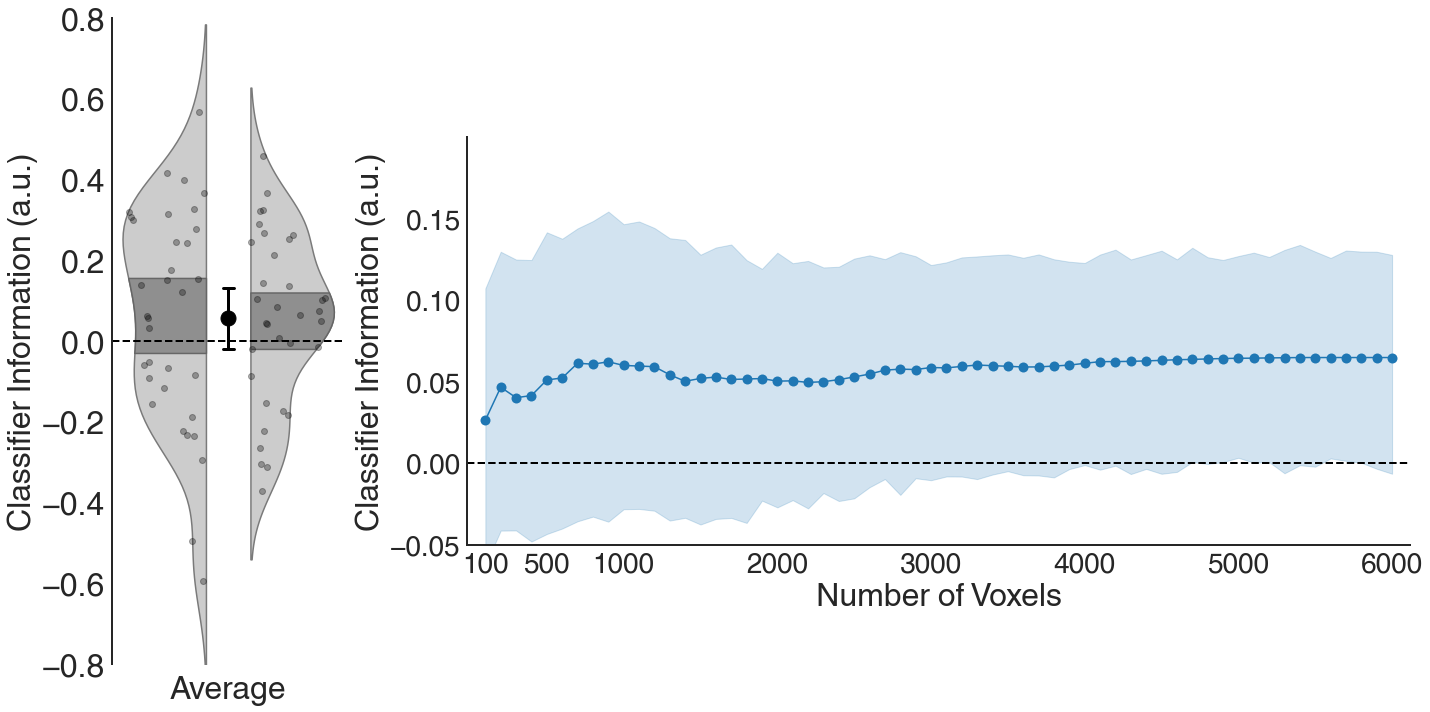

In [30]:
plot_by_nvoxels(res_1718, right_part=True, tfce_pvals=tfce_pvals_1718)
plt.savefig('results_plots/vistemp_1718_nvox_noexcl.svg')

## Accuracy

In [34]:
# _, _, tfce_pvals_1937, _ = get_tfce_stats(res_1937.groupby(['subject','nvoxels']).mean().reset_index(),
#                                           measure='correct', n_perms=10000)

In [35]:
tfce_pvals_1937 = [0.911, 0.506, 0.578, 0.287, 0.391, 0.272, 0.272, 0.367, 0.32 ,
       0.147, 0.379, 0.192, 0.15 , 0.163, 0.261, 0.373, 0.394, 0.339,
       0.556, 0.435, 0.35 , 0.33 , 0.226, 0.239, 0.222, 0.153, 0.272,
       0.258, 0.316, 0.22 , 0.113, 0.05 , 0.08 , 0.103, 0.112, 0.077,
       0.05 , 0.036, 0.019, 0.033, 0.021, 0.051, 0.035, 0.05 , 0.048,
       0.047, 0.046, 0.05 , 0.02 , 0.009, 0.024, 0.015, 0.015, 0.009,
       0.012, 0.014, 0.008, 0.009, 0.009, 0.014]

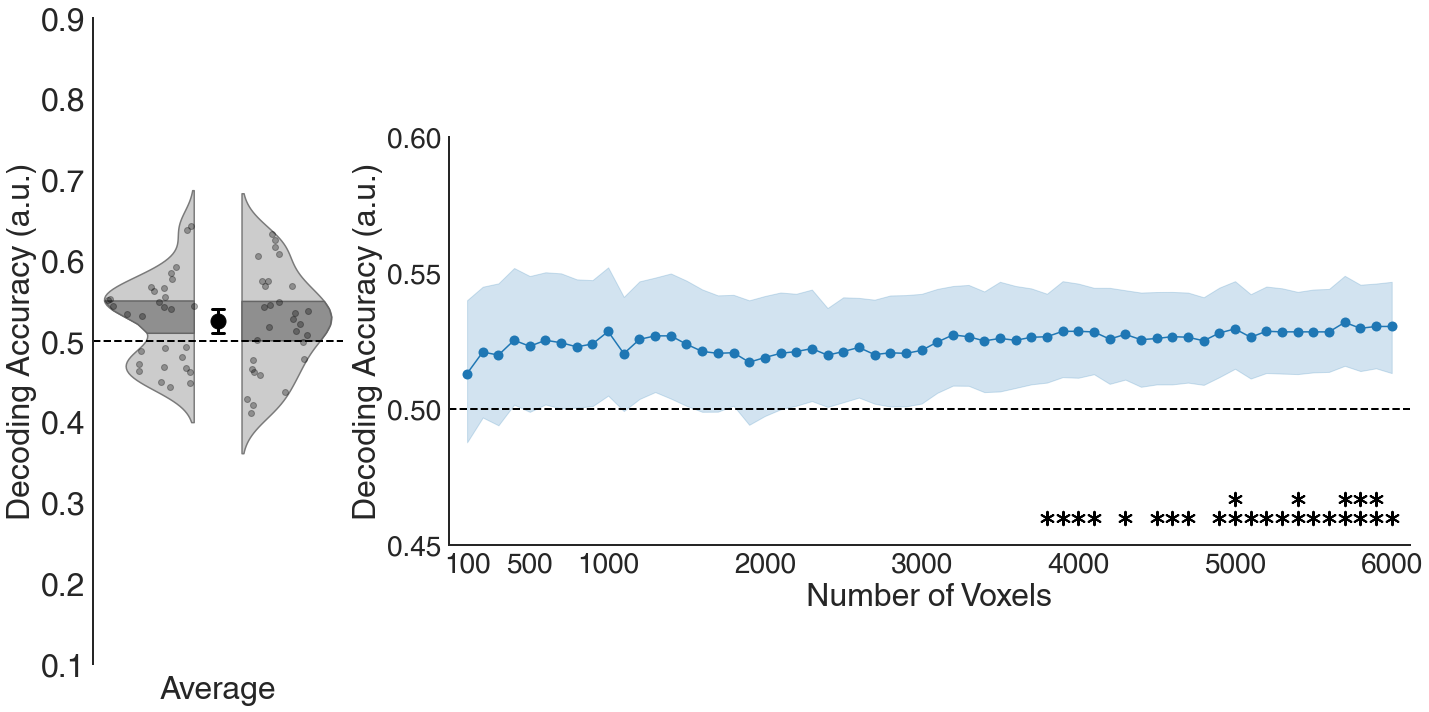

In [43]:
plot_by_nvoxels(res_1937, right_part=True, measure='correct', tfce_pvals=tfce_pvals_1937)
plt.savefig('results_plots/vistemp_1937_nvox_accuracy.svg')

In [ ]:
# _, _, tfce_pvals_1718, _ = get_tfce_stats(res_1718.groupby(['subject','nvoxels']).mean().reset_index(),
#                                           measure='correct', n_perms=10000)

stat_fun(H1): min=1.049231 max=2.405157
Running initial clustering
Using 241 thresholds from 0.00 to 2.40 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [39]:
tfce_pvals_1718 = [0.6432, 0.6653, 0.518 , 0.4839, 0.3441, 0.3401, 0.257 , 0.296 ,
       0.1949, 0.1742, 0.2019, 0.1989, 0.2618, 0.3257, 0.2768, 0.2809,
       0.3723, 0.3472, 0.2396, 0.2256, 0.2366, 0.3096, 0.2661, 0.2661,
       0.2532, 0.171 , 0.2083, 0.219 , 0.151 , 0.119 , 0.1886, 0.1923,
       0.2119, 0.1622, 0.2159, 0.1155, 0.1109, 0.1109, 0.1058, 0.0939,
       0.0939, 0.0855, 0.0986, 0.1027, 0.1081, 0.1094, 0.1039, 0.1039,
       0.1081, 0.1039, 0.1081, 0.1081, 0.1081, 0.1081, 0.1081, 0.1081,
       0.1081, 0.1081, 0.1081, 0.1081]

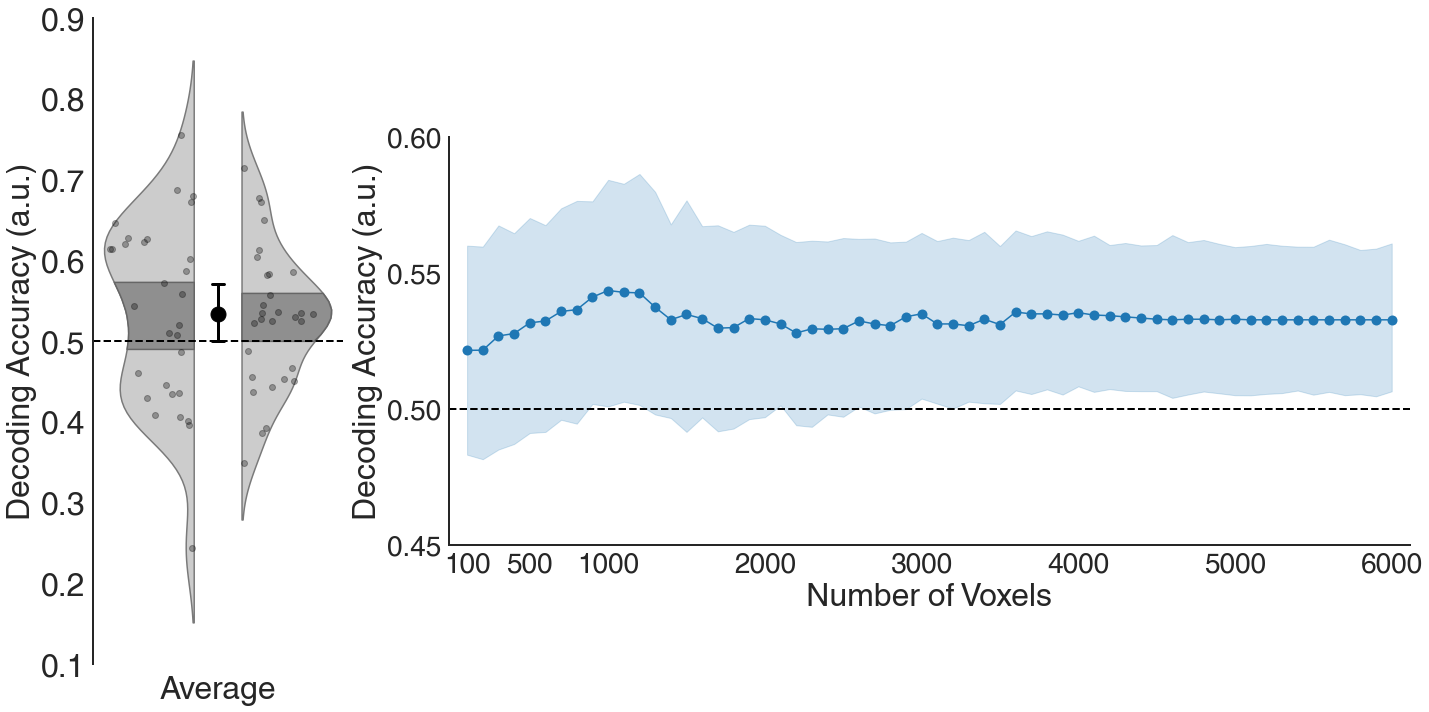

In [42]:
plot_by_nvoxels(res_1718, right_part=True, measure='correct', tfce_pvals=tfce_pvals_1718)
plt.savefig('results_plots/vistemp_1718_nvox_accuracy.svg')

#
#
#
#

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('white')
sns.lineplot(data=meanres[meanres['roi']=='ba-19-37'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [ ]:
subxvoxels = df_to_array_tfce(meanres[meanres['roi']=='ba-17-18'].groupby(['subject', 'nvoxels']).mean().reset_index(),
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-17-18'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [ ]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='R')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='L')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.3, 0.3])
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-19'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 

## Info coupling ROI

In [ ]:
res_list = ['../../../MVPA_results/infocoupling_sphere']
infocouplroires = merge_results(res_list)
infocouplroires = exclude_participants(infocouplroires)

In [ ]:
infocouplroires.distance.mean()

## Full ROIs

In [ ]:
res_list = ['../../../MVPA_results/results_main_fullrois.csv']
fullroiresults = merge_results(res_list)
fullroiresults = parse_roi_info(fullroiresults)
fullroiresults = exclude_participants(fullroiresults)

In [ ]:
fullroi_meanres = fullroiresults.groupby(['roi', 'subject', 'hemi']).mean().reset_index()

In [ ]:
plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=fullroi_meanres, 
            x='roi', y='distance',
            hue='hemi', ci=95)

In [ ]:
x=float('-inf')

In [ ]:
x==float('-inf')

In [ ]:
MVPAres.groupby(['roi', 'testmodel']).mean()